In [76]:
from ipywidgets import interactive
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import transforms
from mpl_toolkits.mplot3d import Axes3D

In [77]:
def theta_calc(x , y , z) :
    theta = np.arctan(np.sqrt(x**2 + y**2)/z)
    
    return theta 

def phi_calc(x ,y) :
    phi = np.arctan(y/x)
    
    return phi

def I_calc_gauss(g1, g2 , g3 , theta) :
    g2_rad = []
    g3_rad = []
    for i in range(len(g2)) :
        g2_rad.append(g2[i]*np.pi/180)
        g3_rad.append(g3[i]*np.pi/180)
    I = 0
    for i in range(len(g1)) :
        I_temp = g1[i]*np.exp(-np.log(2)*((abs(theta)-g2_rad[i])/g3_rad[i])**2)
        I = I + I_temp
    
    return I

def I_calc_cos(c1 , c2 , c3 , theta) :
    I = 0
    c2_rad = []
    for item in c2 :
        c2_rad.append(item*np.pi/180)
    for i in range(len(c1)) :
        I_temp = c1[i]*(np.cos(abs(theta) - c2_rad[i])**c3[i])
        I = I + I_temp
        
    return I

def I_calc_gauss2(g1 , g2 , g3 , g4 , theta , phi):
    phi = np.pi*phi/180
    g2_rad = []
    g3_rad = []
    g4_rad = []
    for i in range(len(g2)) :
        g2_rad.append(g2[i]*np.pi/180)
        g3_rad.append(g3[i]*np.pi/180)
        g4_rad.append(g4[i]*np.pi/180)
    I = 0
    for i in range(len(g1)) :
        I_temp = g1[i]*np.exp(-(np.log(2))*(abs(theta)-g2_rad[i])**2*((np.cos(phi)**2/g3_rad[i]**2)+(np.sin(phi)**2/g4_rad[i]**2)))
        I = I + I_temp
        
    return I

def I_calc_cos2(c1 , c2 , c3 , c4 , theta , phi) :
    I = 0
    for i in range(len(c1)) :
        I_temp = c1[i]*(np.cos(abs(theta)-(c2[i]*(np.cos(phi)**2)+c3[i]*(np.sin(phi)**2)))**c4[i])
        I = I + I_temp
        
    return I

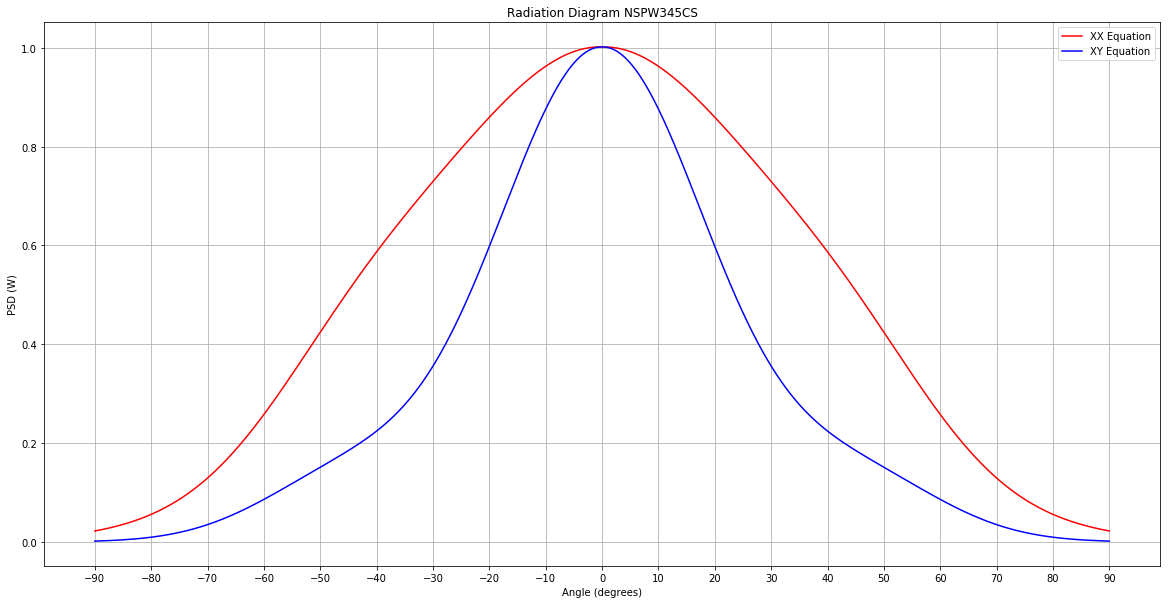

In [78]:
angle = np.linspace(-90 , 90 , 181*10)
theta = angle*np.pi/180
Power_xx = []
Power_xy = []
dis = []
for item in theta :
    dis.append(0.5*np.tan(item))

for item in theta :
    Power_xx.append(I_calc_gauss2([0.13 , 1],[45 , 0],[18 , 38], [18 , 22] ,item , 0))
    Power_xy.append(I_calc_gauss2([0.13 , 1],[45 , 0],[18 , 38], [18 , 22] ,item , 90))

plt.figure(figsize = (20,10))
plt.plot(angle , Power_xx , 'r' , label = "XX Equation")
plt.plot(angle , Power_xy , 'b' ,label = "XY Equation")
plt.grid()
plt.title("Radiation Diagram NSPW345CS")
plt.xlabel("Angle (degrees)")
plt.ylabel("PSD (W)")
plt.legend()
plt.xticks(np.arange(-90 , 100 , step = 10))
plt.show()

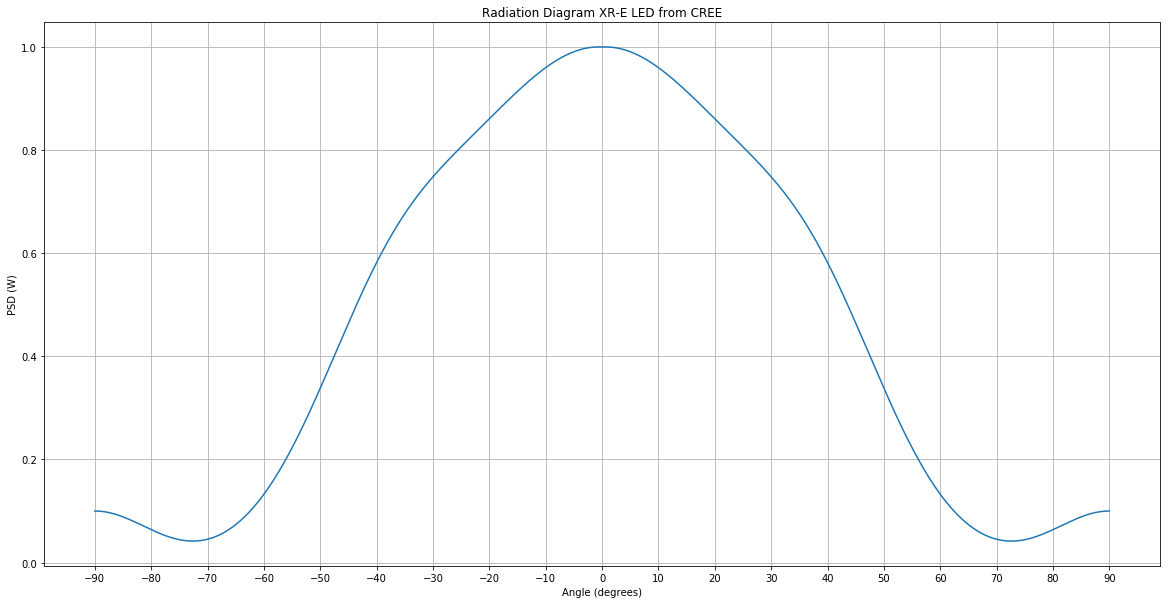

In [79]:
angle = np.linspace(-90 , 90 , 181*10)
theta = angle*np.pi/180
Power = []
dis = []
for item in theta :
    dis.append(0.5*np.tan(item))

for item in theta :
    Power.append(I_calc_cos([1 , 0.17 , 0.1],[0.43 , 39 , 90],[3.4 , 24 , 32.7],item))

plt.figure(figsize = (20,10))
plt.plot(angle , Power)
plt.grid()
plt.title("Radiation Diagram XR-E LED from CREE")
plt.xlabel("Angle (degrees)")
plt.ylabel("PSD (W)")
plt.xticks(np.arange(-90 , 100 , step = 10))
plt.show()

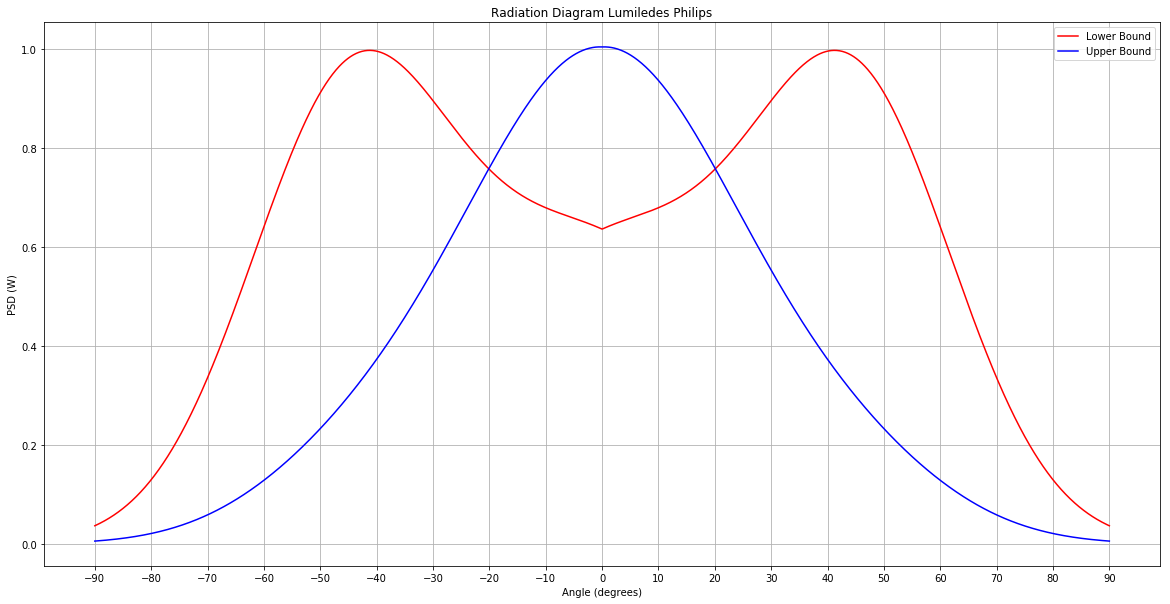

In [80]:
angle = np.linspace(-90 , 90 , 181*10)
theta = angle*np.pi/180
Power_UB = []
Power_LB = []
dis = []
for item in theta :
    dis.append(0.5*np.tan(item))

for item in theta :
    Power_LB.append(I_calc_gauss(np.array([0.76 , 1.1])*.79,[0 , 45],[29 , 21],item))
    Power_UB.append(I_calc_gauss([1 , 0.11],[0 , 45],[29 , 21],item))

plt.figure(figsize = (20,10))
plt.plot(angle , Power_LB , 'r' , label = "Lower Bound")
plt.plot(angle , Power_UB , 'b' , label = "Upper Bound")
plt.grid()
plt.title("Radiation Diagram Lumiledes Philips")
plt.xlabel("Angle (degrees)")
plt.ylabel("PSD (W)")
plt.legend()
plt.xticks(np.arange(-90 , 100 , step = 10))
plt.show()

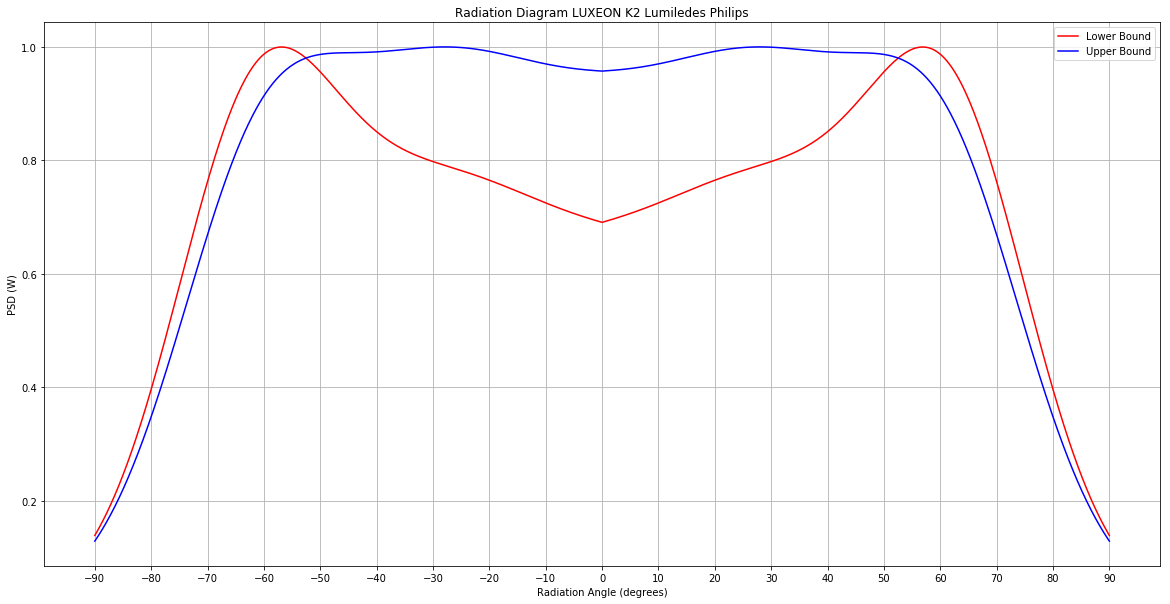

In [81]:
angle = np.linspace(-90 , 90 , 181*10)
theta = angle*np.pi/180
Power_UB = []
Power_LB = []
dis = []
for item in theta :
    dis.append(0.5*np.tan(item))

for item in theta :
    Power_LB.append(I_calc_gauss(np.array([0.6 , 0.7 , 0.53])*1,[62.7 , 32.7 , -19.9],[16.1 , 30.1 , 28.9],item))
    Power_UB.append(I_calc_gauss(np.array([0.42 , 0.88 , 0.79])*1,[62.7 , 32.7 , -19.9],[16.1 , 30.1 , 28.9],item))

plt.figure(figsize = (20,10))
plt.plot(angle , Power_LB , 'r' , label = "Lower Bound")
plt.plot(angle , Power_UB , 'b' , label = "Upper Bound")
plt.grid()
plt.title("Radiation Diagram LUXEON K2 Lumiledes Philips")
plt.xlabel("Radiation Angle (degrees)")
plt.ylabel("PSD (W)")
plt.legend()
plt.xticks(np.arange(-90 , 100 , step = 10))
plt.show()

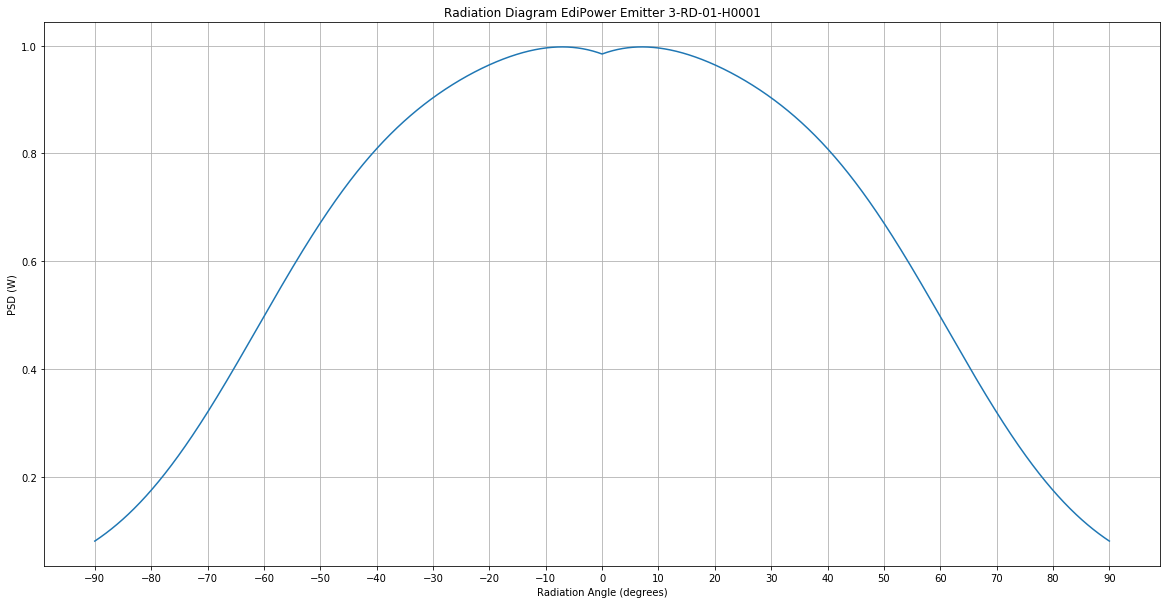

In [82]:
angle = np.linspace(-90 , 90 , 181*10)
theta = angle*np.pi/180
Power = []

for item in theta :
    Power.append(I_calc_gauss(np.array([.381 , 0.944])*1,[47.1 , 0],[26.2 , 38.5],item))

plt.figure(figsize = (20,10))
plt.plot(angle , Power)
plt.grid()
plt.title("Radiation Diagram EdiPower Emitter 3-RD-01-H0001")
plt.xlabel("Radiation Angle (degrees)")
plt.ylabel("PSD (W)")
plt.xticks(np.arange(-90 , 100 , step = 10))
plt.show()